### Homework 1 (Regression)
COSC 3337 Dr. Rizk

### Part 1. Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# rcParams['figure.figsize'] = 8, 5
# sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \
0        mpfi       3.47    2.68              9.0        111     5000      21   
1        mpfi       3.47    2.68              9.0        111     5000      21   
2        mpfi       2.68    3.47              9.0        154     5000      19   
3        mpfi       3.19    3.40             10.0        102     5500      24   
4        mpfi       3.19    3.40              8.0        115     5500      18   

   highwaympg    price  
0          27  13495.0  
1          27  16500.0  
2          26  16500.0  
3          30  13950.0  
4          22  17450.0  

[5 rows x 26 columns]

In [4]:
df.describe()

car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844    0.313597          3.972040   
min    1488.000000   61.000000    2.540000    2.070000          7.000000   
25%    2145.000000   97.000000    3.150000    3.110000          8.600000   
50%    2414.000000  120.000000    3.310000    3.290000          9.000000   
75%    2935.000000  141.000000    3.580000    3.410000          9.400000   
max    4066.000000  326.000000    3.940000    4.170000         23.000000   

       horsepower      peakrpm     citympg  highwaympg         price  
count  205.000000   205.000000  205.000000  205.000000    205.000000  
mean   104.117073  5125.121951   25.219512   30.751220  13276.710571  
std     39.544167   476.985643    6.542142    6.886443   7988.852332  
min     48.000000  4150.000000   13.000000   16.000000   5118.000000  
25%     70.000000  4800.000000   19.000000   25.000000   7788.000000  
50%     95.000000  5200.000000   24.000000   30.000000  10295.000000  
75%    116.000000  5500.000000   30.000000   34.000000  16503.000000  
max    288.000000  6600.000000   49.000000   54.000000  45400.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Part 2. Data Cleaning and Preparation

In [6]:
df['CompanyName'] = df['CarName'].apply(lambda x:x.split(' ')[0])

print('The unique companies in our dataset are: \n',df.CompanyName.unique())

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [7]:
df['CompanyName'].replace('toyouta', 'toyota',inplace=True)
df['CompanyName'].replace('Nissan', 'nissan',inplace=True)
df['CompanyName'].replace('maxda', 'mazda',inplace=True)
df['CompanyName'].replace('vokswagen', 'volkswagen',inplace=True)
df['CompanyName'].replace('vw', 'volkswagen',inplace=True)
df['CompanyName'].replace('porcshce', 'porsche',inplace=True)

print('The unique companies in our dataset are: \n',df.CompanyName.unique())

The unique companies in our dataset are: 
 ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


### Part 3. Visualising Categorical Data


#### Create the following plots

- 1- A plot of the unique company names on the x-axis, and the value counts on the y-axis.
- 2- A plot of the unique car bodys on the x-axis and value counts on the y-axis.

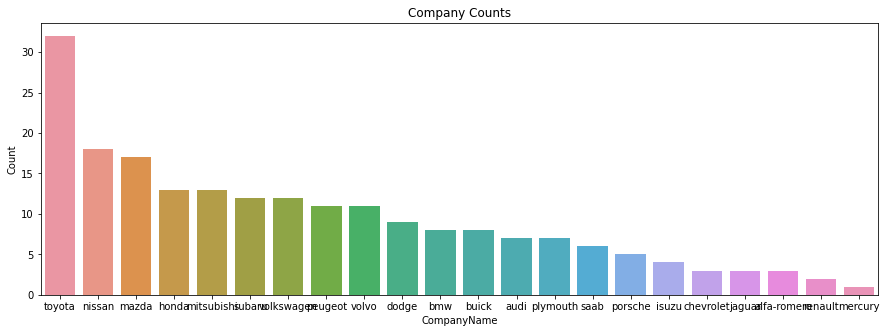

<Figure size 432x288 with 0 Axes>

In [8]:
fig, ax = plt.subplots(figsize = (15,5))

plt1 = sns.countplot(df['CompanyName'], order=pd.value_counts(df['CompanyName']).index,)
plt1.set(xlabel = 'CompanyName', ylabel= 'Count')
plt1.set_title("Company Counts")
plt.show()
plt.tight_layout()

plt1 = sns.countplot(df['carbody'], order=pd.value_counts(df['carbody']).index,)
plt1.set(xlabel = 'carbody', ylabel= 'Count')
plt1.set_title("Car Body Counts")
plt.show()
plt.tight_layout()

#### describe what we can conclude from them
- Toyota best car company.
- sedan is the best car prefered.

#### Create the following plots

- 1- A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
- 2- A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis..

Text(0.5, 1.0, 'Company vs. Avgerage Price ')

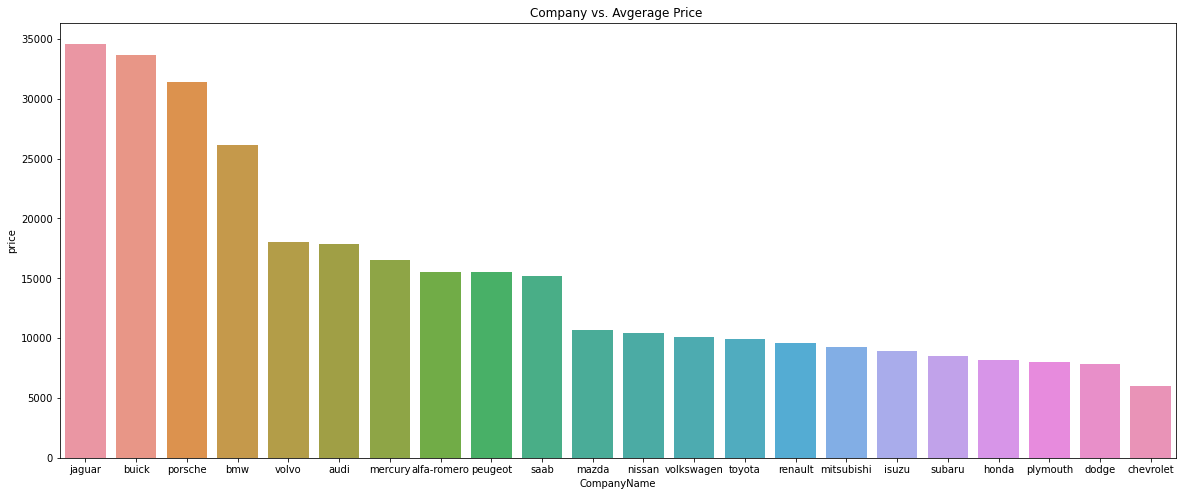

In [9]:
plt.figure(figsize=(20,8))
df_= pd.DataFrame(df.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False)).reset_index()
plt = sns.barplot(x='CompanyName' ,y = 'price',data = df_ )
plt.set_title("Company vs. Avgerage Price ")

Text(0.5, 1.0, 'Car Body vs. Avgerage Price ')

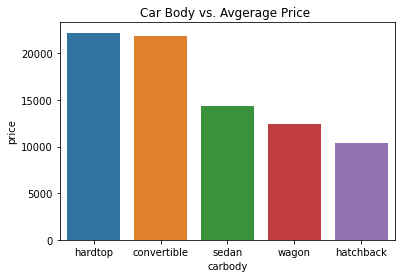

In [10]:
df_ = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False)).reset_index()
plt = sns.barplot(x='carbody' ,y = 'price',data = df_)
plt.set_title("Car Body vs. Avgerage Price ")

#### describe what we can conclude from them
- Jaguar ,Buick and porsche seem to have highest average price.
- hardtop and convertible higher price.

#### Create the following plots

- 1- A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
- 2- A box plot of the unique symboling values on the x-axis and price on the y-axis.

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

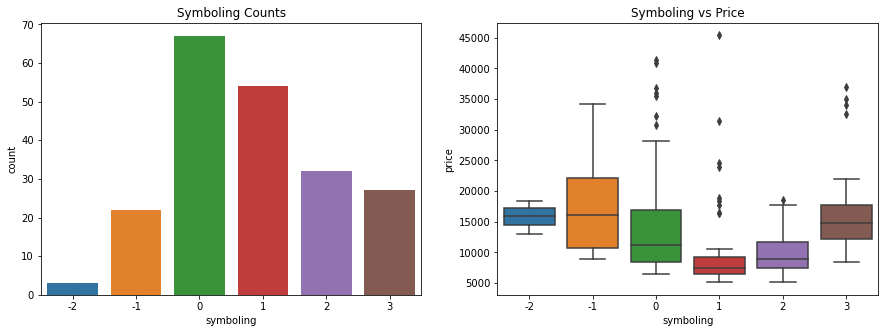

In [12]:
plt.subplots(figsize = (15,5))

plt.subplot(1,2,1)
plt.title('Symboling Counts')
sns.countplot(df.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price)

plt.show()

#### describe what we can conclude from them
- symboling with 0 values is the most sold.
- The cars with symboling -1 symboling are high priced 

#### Create the following plots

- 1- A plot of enginetype on the x-axis, and the value counts on the y-axis.
- 2- A box plot of enginetype on the x-axis and price on the y-axis.

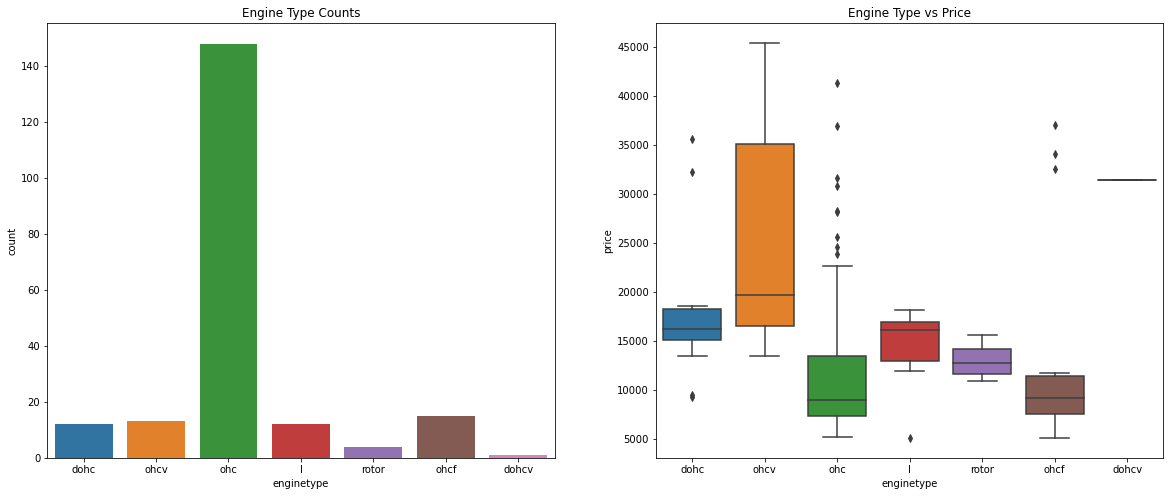

In [13]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Counts')
sns.countplot(df.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=df.enginetype, y=df.price)

plt.show()



#### describe what we can conclude from them
- ohc Engine type is most favored type.
- The ohcv has the bigest price range.

#### Create the following plots

- 1- A plot of cylindernumber on the x-axis, and the value counts on the y-axis..
- 2- A box plot of cylindernumber on the x-axis and price on the y-axis..

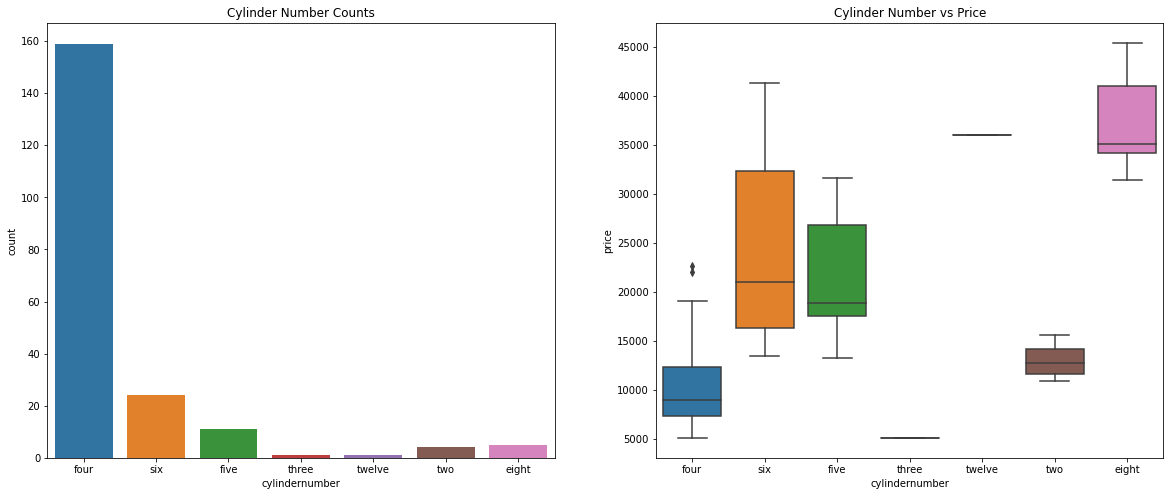

In [14]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Cylinder Number Counts')
sns.countplot(df.cylindernumber)

plt.subplot(1,2,2)
plt.title('Cylinder Number vs Price')
sns.boxplot(x=df.cylindernumber, y=df.price)

plt.show()

#### describe what we can conclude from them
- Four cylinders is most favored type.
- The six cylinders has the bigest price range.

#### Create the following plots

- 1- A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
- 2- A box plot of fuelsystem on the x-axis and price on the y-axis.

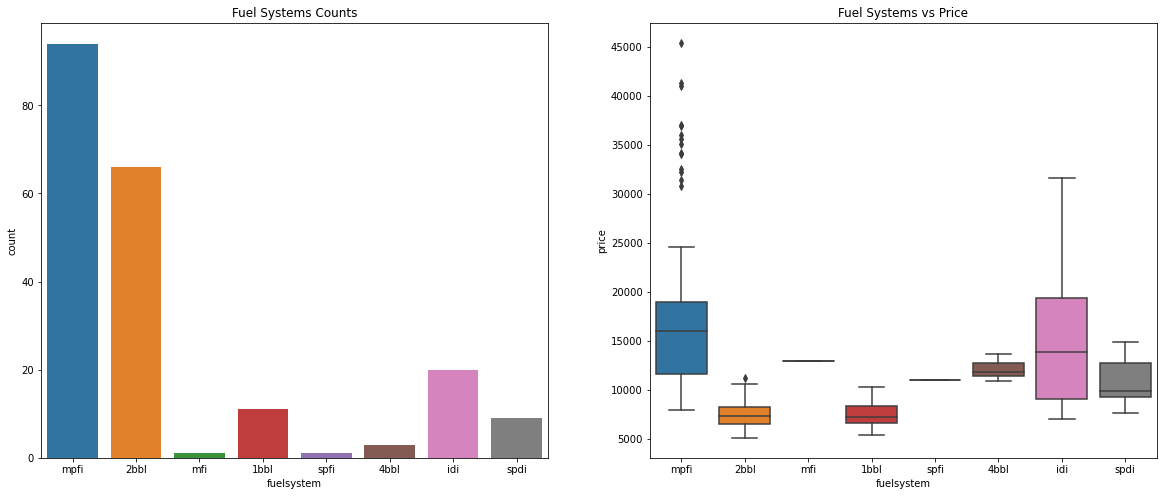

In [15]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Systems Counts')
sns.countplot(df.fuelsystem)

plt.subplot(1,2,2)
plt.title('Fuel Systems vs Price')
sns.boxplot(x=df.fuelsystem, y=df.price)

plt.show()

#### describe what we can conclude from them
- mpfi fuel system type is most favored type.
- The idi feul system has the bigest price range.

#### Create the following plots

- 1- A plot of drivewheel on the x-axis, and the value counts on the y-axis.
- 2- A box plot of drivewheel on the x-axis and price on the y-axis.

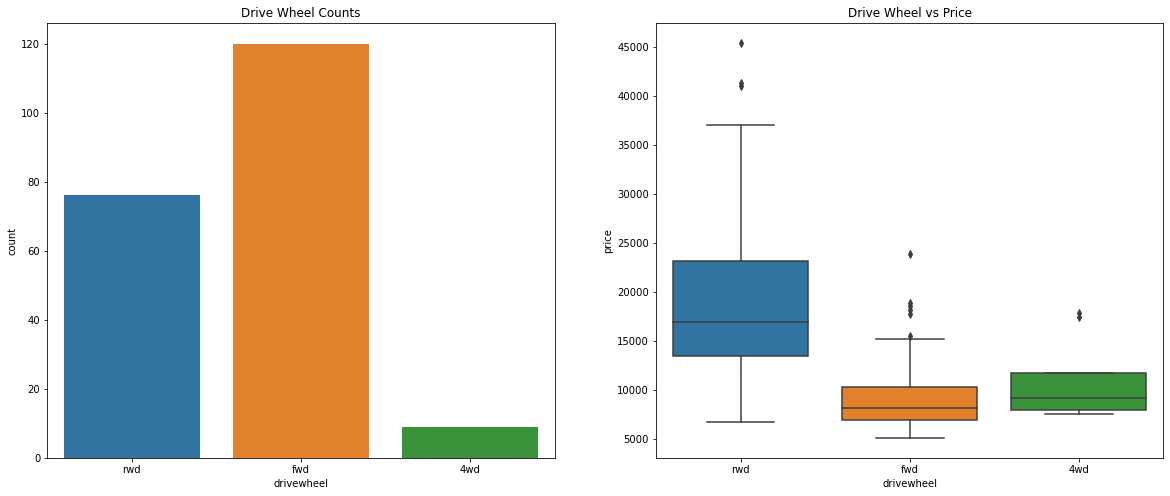

In [16]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Drive Wheel Counts')
sns.countplot(df.drivewheel)

plt.subplot(1,2,2)
plt.title('Drive Wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price)

plt.show()

#### describe what we can conclude from them
- fwd drive wheel type is most favored type.
- The rwd has the bigest price range.

#### Create the following plots

- 1- A plot of enginelocation on the x-axis, and the value counts on the y-axis.
- 2- A box plot of enginelocation on the x-axis and price on the y-axis.

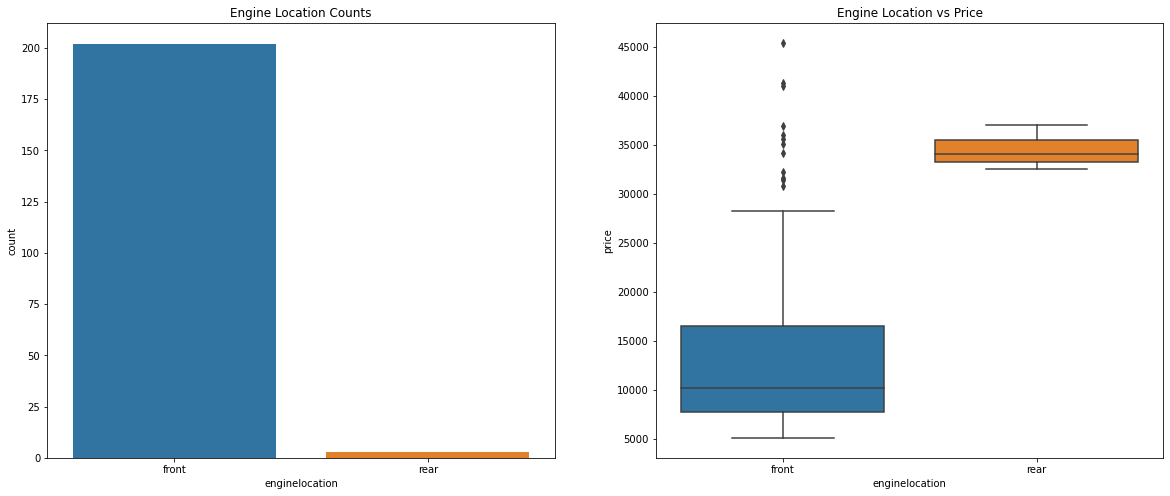

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Location Counts')
sns.countplot(df.enginelocation)

plt.subplot(1,2,2)
plt.title('Engine Location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price)

plt.show()

#### describe what we can conclude from them
- front Engine location is most favored type.
- The front has the bigest price range.

#### Create the following plots

- 1- A plot of fueltype on the x-axis, and the value counts on the y-axis.
- 2- A box plot of fueltype on the x-axis and price on the y-axis.

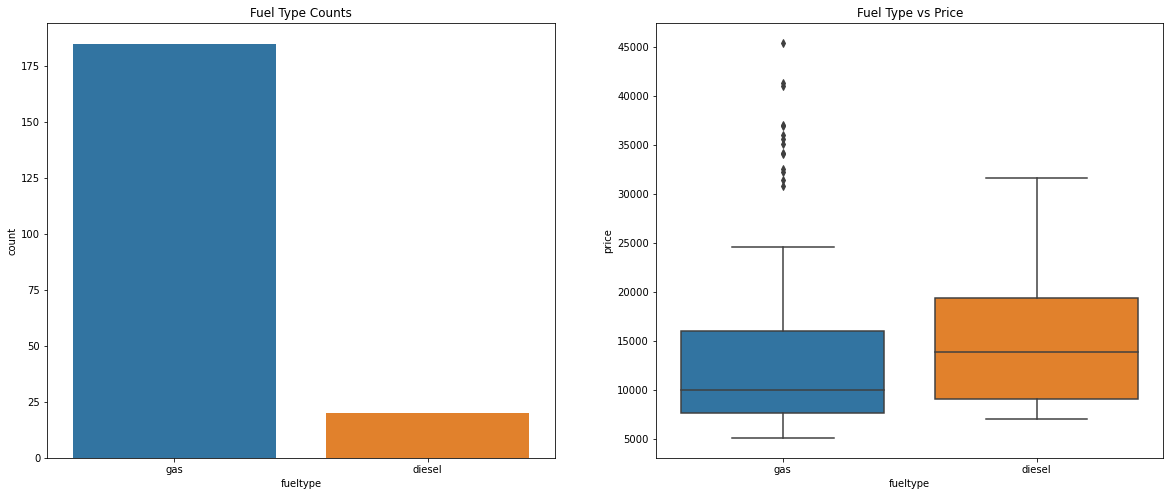

In [18]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Fuel Type Counts')
sns.countplot(df.fueltype)

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=df.fueltype, y=df.price)

plt.show()

#### describe what we can conclude from them
- gas feul type is most favored type.
- The diesel has the bigest price range.

#### Create the following plots

- 1- A plot of doornumber on the x-axis, and the value counts on the y-axis.
- 2- A box plot of doornumber on the x-axis and price on the y-axis.

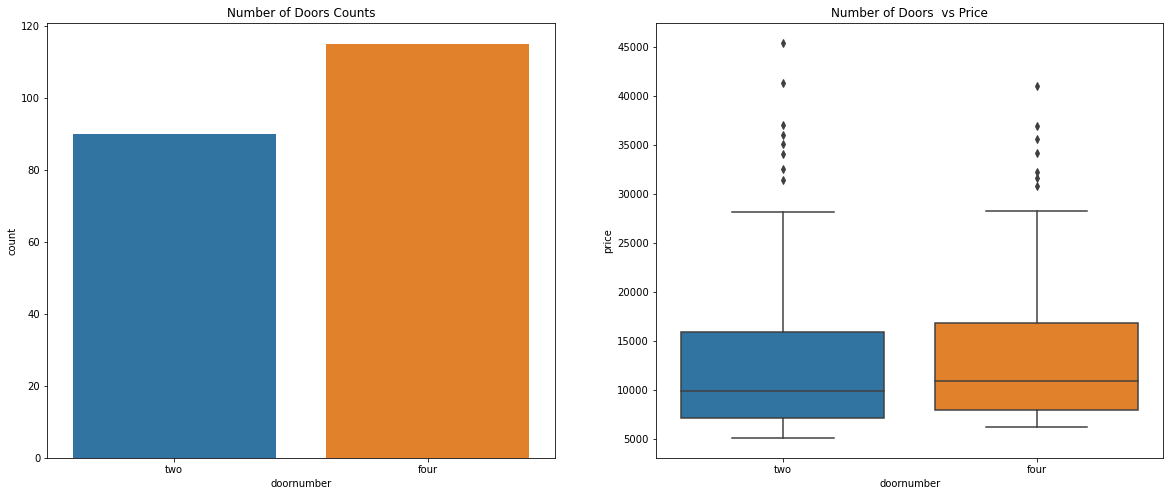

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Number of Doors Counts')
sns.countplot(df.doornumber)

plt.subplot(1,2,2)
plt.title('Number of Doors  vs Price')
sns.boxplot(x=df.doornumber, y=df.price)

plt.show()

#### describe what we can conclude from them
- foor cae doors type is most favored type.

#### Create the following plots

- 1- A plot of aspiration on the x-axis, and the value counts on the y-axis.
- 2- A box plot of aspiration on the x-axis and price on the y-axis.


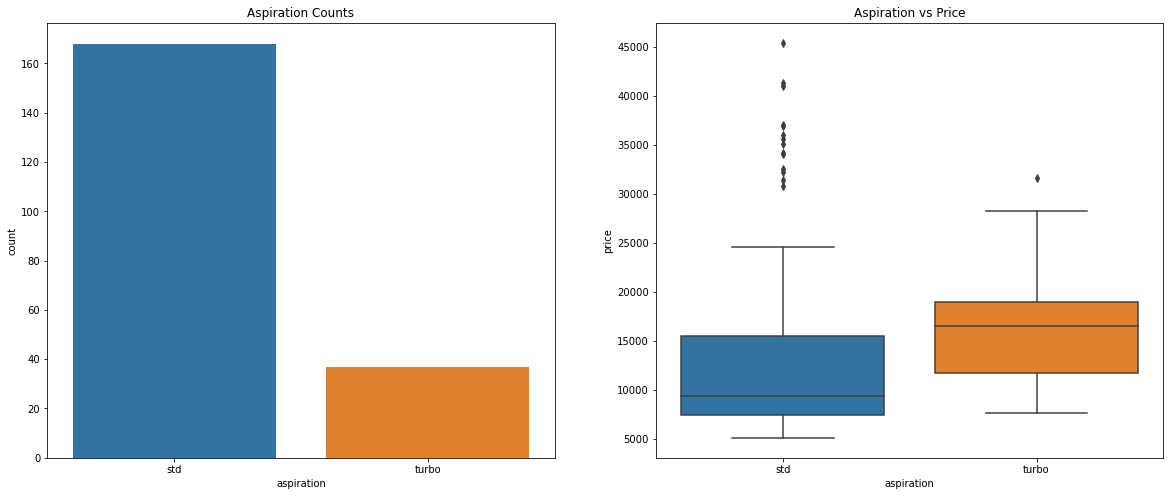

In [20]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Aspiration Counts')
sns.countplot(df.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price)

plt.show()

#### describe what we can conclude from them
- std aspiration type is most favored type.


#### Create the following plots

- 1- A plot showing the price distribution
- 2- A box plot of price


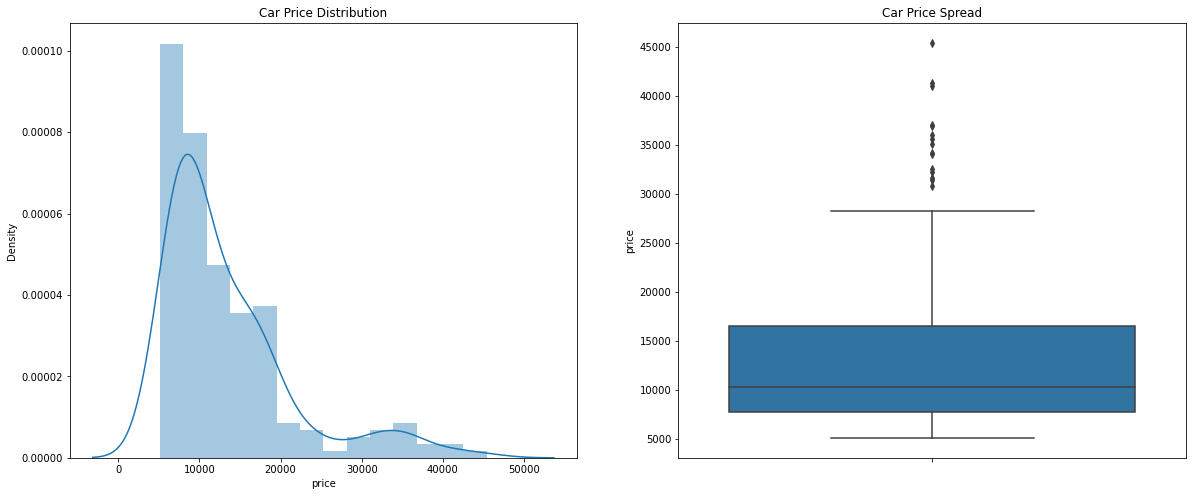

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=df.price,orient="v")

plt.show()

#### describe what we can conclude from them
- the graph is right-skewed which means most of the values are in the low region 

#### Create the following plots

- 1-A scatter plot of carlength vs price.
- 2-A scatter plot of carwidth vs price.
- 3-A scatter plot of carheight vs price.
- 4-A scatter plot of carweight vs price.

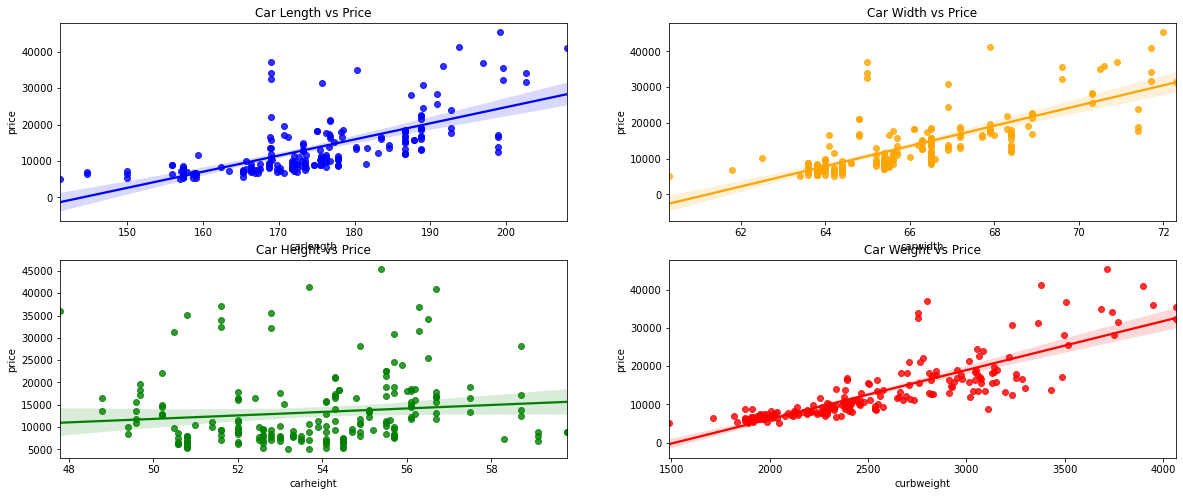

In [22]:
plt.figure(figsize=(20,8))

plt.subplot(2,2,1)
plt.title('Car Length vs Price')
sns.regplot(df['carlength'],df['price'],color="blue")

plt.subplot(2,2,2)
plt.title('Car Width vs Price')
sns.regplot(df['carwidth'],df['price'],color="orange")

plt.subplot(2,2,3)
plt.title('Car Height vs Price')
sns.regplot(df['carheight'],df['price'],color="green")


plt.subplot(2,2,4)
plt.title('Car Weight vs Price')
sns.regplot(df['curbweight'],df['price'],color="red")

plt.show()

#### describe what we can conclude from them
- Car Width, Car Length and Car Weight have a poitive correlation. carheight doesn't.

#### Create the following plots

- 1-A scatter plot of enginesize vs price.
- 2-A scatter plot of boreratio vs price.
- 3-A scatter plot of stroke vs price.
- 4-A scatter plot of compressionratio vs price.
- 5-A scatter plot of horsepower vs price.
- 6-A scatter plot of peakrpm vs price.
- 7-A scatter plot of wheelbase vs price.
- 8-A scatter plot of citympg vs price.
- 9-A scatter plot of highwaympg vs price.

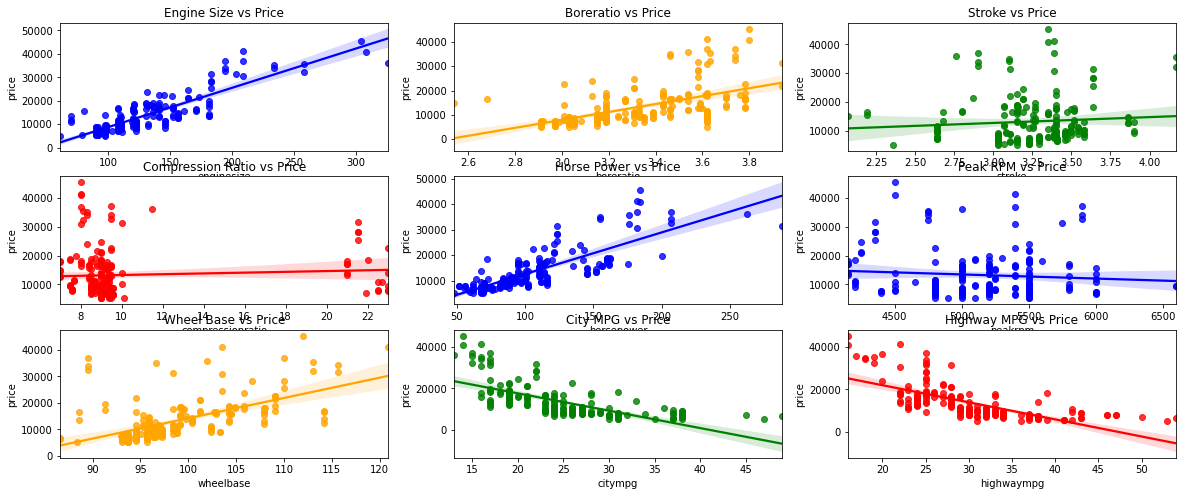

In [23]:
plt.figure(figsize=(20,8))

plt.subplot(3,3,1)
plt.title('Engine Size vs Price')
sns.regplot(df['enginesize'],df['price'],color="blue")

plt.subplot(3,3,2)
plt.title('Boreratio vs Price')
sns.regplot(df['boreratio'],df['price'],color="orange")

plt.subplot(3,3,3)
plt.title('Stroke vs Price')
sns.regplot(df['stroke'],df['price'],color="green")

plt.subplot(3,3,4)
plt.title('Compression Ratio vs Price')
sns.regplot(df['compressionratio'],df['price'],color="red")

plt.subplot(3,3,5)
plt.title('Horse Power vs Price')
sns.regplot(df['horsepower'],df['price'],color="blue")

plt.subplot(3,3,6)
plt.title('Peak RPM vs Price')
sns.regplot(df['peakrpm'],df['price'],color="blue")

plt.subplot(3,3,7)
plt.title('Wheel Base vs Price')
sns.regplot(df['wheelbase'],df['price'],color="orange")

plt.subplot(3,3,8)
plt.title('City MPG vs Price')
sns.regplot(df['citympg'],df['price'],color="green")


plt.subplot(3,3,9)
plt.title('Highway MPG vs Price')
sns.regplot(df['highwaympg'],df['price'],color="red")


plt.show()

#### describe what we can conclude from them
- enginesize, boreratio, horsepower, wheelbase have a poitive correlation.


- Create a heatmap or correlation matrix to inspect the correlations in our dataset.


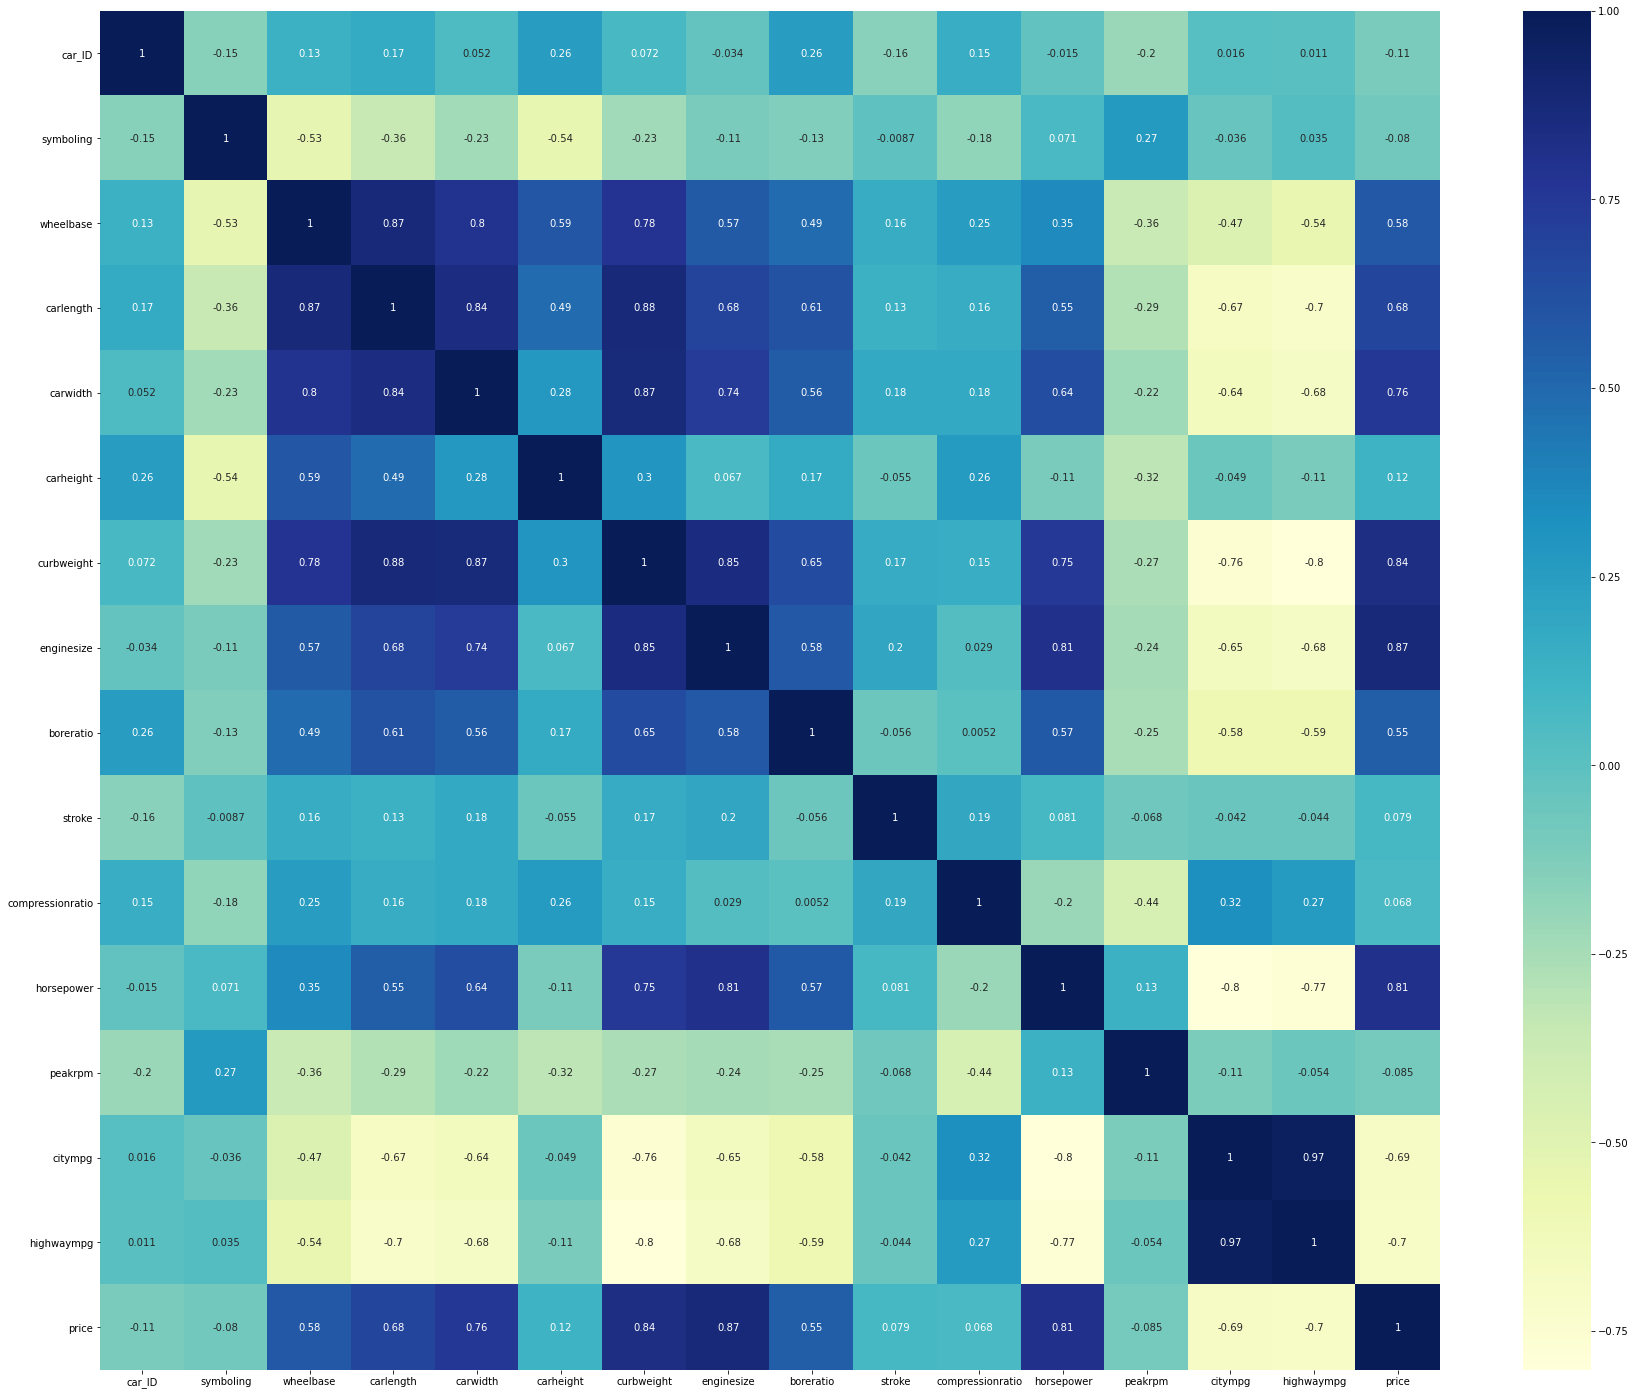

In [24]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### describe what we can conclude from them
- curbweight, enginesize, horsepower,carwidth Highly correlated 

#### For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.



In [55]:
df['fueleconomy'] = (0.55 * df['citympg']) + (0.45 * df['highwaympg'])
df.head()

car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  boreratio  stroke  \
0  convertible        rwd          front       88.6  ...       3.47    2.68   
1  convertible        rwd          front       88.6  ...       3.47    2.68   
2    hatchback        rwd          front       94.5  ...       2.68    3.47   
3        sedan        fwd          front       99.8  ...       3.19    3.40   
4        sedan        4wd          front       99.4  ...       3.19    3.40   

   compressionratio  horsepower peakrpm citympg  highwaympg    price  \
0               9.0         111    5000      21          27  13495.0   
1               9.0         111    5000      21          27  16500.0   
2               9.0         154    5000      19          26  16500.0   
3              10.0         102    5500      24          30  13950.0   
4               8.0         115    5500      18          22  17450.0   

   CompanyName  fueleconomy  
0  alfa-romero        23.70  
1  alfa-romero        23.70  
2  alfa-romero        22.15  
3         audi        26.70  
4         audi        19.80  

[5 rows x 28 columns]

### Part 5. Data Pre-Processing


Perform the following

- Convert your categorical variables into dummy variables
- Scale the data using a scaler of your choice
- Split your data into a training and testing set, with test size of 0.30

In [56]:
df_ = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth']]
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df

df_ = dummies('fueltype',df_)
df_ = dummies('aspiration',df_)
df_ = dummies('carbody',df_)
df_ = dummies('drivewheel',df_)
df_ = dummies('enginetype',df_)
df_ = dummies('cylindernumber',df_)
df_.head()

price  wheelbase  curbweight  enginesize  boreratio  horsepower  \
0  13495.0       88.6        2548         130       3.47         111   
1  16500.0       88.6        2548         130       3.47         111   
2  16500.0       94.5        2823         152       2.68         154   
3  13950.0       99.8        2337         109       3.19         102   
4  17450.0       99.4        2824         136       3.19         115   

   fueleconomy  carlength  carwidth  gas  ...  ohc  ohcf  ohcv  rotor  five  \
0        23.70      168.8      64.1    1  ...    0     0     0      0     0   
1        23.70      168.8      64.1    1  ...    0     0     0      0     0   
2        22.15      171.2      65.5    1  ...    0     0     1      0     0   
3        26.70      176.6      66.2    1  ...    1     0     0      0     0   
4        19.80      176.6      66.4    1  ...    1     0     0      0     1   

   four  six  three  twelve  two  
0     1    0      0       0    0  
1     1    0      0       0    0  
2     0    1      0       0    0  
3     1    0      0       0    0  
4     0    0      0       0    0  

[5 rows x 29 columns]

In [57]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df_, train_size = 0.7, test_size = 0.3, random_state = 30)

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
f1 = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[f1] = scaler.fit_transform(df_train[f1])

y_train = df_train.pop('price')
X_train = df_train


f2 = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_test[f2] = scaler.fit_transform(df_test[f2])

y_test = df_test.pop('price')
X_test = df_test

### Part 6. Model Creation and Evaluation

 Perform the following using sklearn

- 1- Create a linear regression model, and train (fit) it on the training data.
- 2- Run the test data through your model to obtain predictions. Save these predictions into a variable called 'predictions'.
- 3- Create a scatter plot of the true price labels vs the predicted price value of your model.
- 4- Create a histogram of the residuals
- 5- Print the R^2 of your model

In [59]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
LinearRegression = LinearRegression()
LinearRegression.fit(X_train,y_train)
R = RFE(LinearRegression, 10)
R = R.fit(X_train, y_train)


In [63]:
import statsmodels.api as sm  
from sklearn.metrics import r2_score 
LinearRegression = sm.OLS(y_train,X_train).fit()
y_train_pred = LinearRegression.predict(X_train)

In [79]:
y_pred = LinearRegression.predict(X_test)


R-Squared: 0.8087004781657277


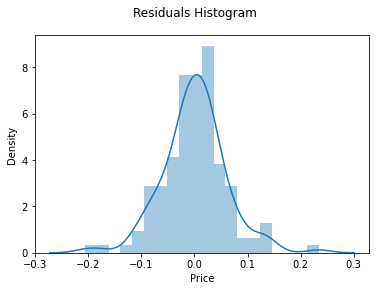

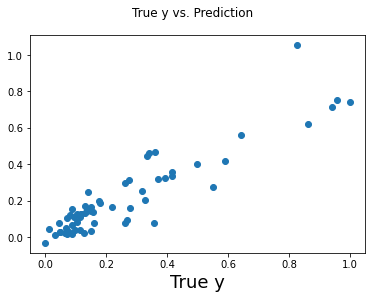

In [82]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Residuals Histogram ')          
plt.xlabel('Price')  


fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('True y vs. Prediction')          
plt.xlabel('True y', fontsize=18)  


print('R-Squared:',r2_score(y_test, y_pred))

#### Lastly, create a dataframe of your model's coefficents. For example, we obtained the coefficients below.



In [87]:
X_train.columns

Index(['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
       'fueleconomy', 'carlength', 'carwidth', 'gas', 'turbo', 'hardtop',
       'hatchback', 'sedan', 'wagon', 'fwd', 'rwd', 'dohcv', 'l', 'ohc',
       'ohcf', 'ohcv', 'rotor', 'five', 'four', 'six', 'three', 'twelve',
       'two'],
      dtype='object')

In [89]:
coef = pd.DataFrame()
coef['Features'] = X_train.columns
coef['coef'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
coef['coef'] = round(coef['coef'], 2)
coef = coef.sort_values(by = "coef", ascending = False)
coef

Features    coef
27          two     inf
21        rotor     inf
1    curbweight  242.40
23         four  165.93
6     carlength  109.68
2    enginesize   92.79
7      carwidth   82.45
3     boreratio   48.69
4    horsepower   48.39
0     wheelbase   46.88
12        sedan   41.66
11    hatchback   34.71
8           gas   33.02
5   fueleconomy   32.56
18          ohc   23.48
14          fwd   21.66
15          rwd   17.02
24          six   13.07
13        wagon   12.75
22         five   10.04
10      hardtop    4.51
9         turbo    4.24
20         ohcv    4.06
17            l    4.03
25        three    3.96
19         ohcf    3.90
26       twelve    2.03
16        dohcv     NaN

#### What do your coefficients mean? Write a conclusion answering the problem statement we listed earlier, and what you've learned from the model.

- we find that R-sqaured is 0.8087  represents the proportion of the variance for a dependent variable.
- p-values for all the coefficients seem to be less than the significance level of 0.05. so all the predictors are  significant.